# <center><i><u><font color="DarkBlue">Cross Validation On ParisHousing Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import warnings 
warnings.filterwarnings('ignore')

from sklearn.model_selection import cross_val_score,train_test_split
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.preprocessing import LabelEncoder,RobustScaler,StandardScaler
from sklearn.linear_model import LinearRegression,Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor,RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import LinearSVR


In [2]:
data = pd.read_csv('./ParisHousing.csv')
data

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price
0,75523,3,0,1,63,9373,3,8,2005,0,1,4313,9005,956,0,7,7559081.5
1,80771,39,1,1,98,39381,8,6,2015,1,0,3653,2436,128,1,2,8085989.5
2,55712,58,0,1,19,34457,6,8,2021,0,0,2937,8852,135,1,9,5574642.1
3,32316,47,0,0,6,27939,10,4,2012,0,1,659,7141,359,0,3,3232561.2
4,70429,19,1,1,90,38045,3,7,1990,1,0,8435,2429,292,1,4,7055052.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1726,89,0,1,5,73133,7,6,2009,0,1,9311,1698,218,0,4,176425.9
9996,44403,29,1,1,12,34606,9,4,1990,0,1,9061,1742,230,0,0,4448474.0
9997,83841,3,0,0,69,80933,10,10,2005,1,1,8304,7730,345,1,9,8390030.5
9998,59036,70,0,0,96,55856,1,3,2010,0,1,2590,6174,339,1,4,5905107.0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   squareMeters       10000 non-null  int64  
 1   numberOfRooms      10000 non-null  int64  
 2   hasYard            10000 non-null  int64  
 3   hasPool            10000 non-null  int64  
 4   floors             10000 non-null  int64  
 5   cityCode           10000 non-null  int64  
 6   cityPartRange      10000 non-null  int64  
 7   numPrevOwners      10000 non-null  int64  
 8   made               10000 non-null  int64  
 9   isNewBuilt         10000 non-null  int64  
 10  hasStormProtector  10000 non-null  int64  
 11  basement           10000 non-null  int64  
 12  attic              10000 non-null  int64  
 13  garage             10000 non-null  int64  
 14  hasStorageRoom     10000 non-null  int64  
 15  hasGuestRoom       10000 non-null  int64  
 16  price              1000

In [4]:
data.shape

(10000, 17)

In [5]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
squareMeters,10000.0,4.987013e+04,2.877438e+04,89.0,25098.50,50105.5,74609.75,99999.0
numberOfRooms,10000.0,5.035840e+01,2.881670e+01,1.0,25.00,50.0,75.00,100.0
hasYard,10000.0,5.087000e-01,4.999493e-01,0.0,0.00,1.0,1.00,1.0
hasPool,10000.0,4.968000e-01,5.000148e-01,0.0,0.00,0.0,1.00,1.0
floors,10000.0,5.027630e+01,2.888917e+01,1.0,25.00,50.0,76.00,100.0
cityCode,10000.0,5.022549e+04,2.900668e+04,3.0,24693.75,50693.0,75683.25,99953.0
cityPartRange,10000.0,5.510100e+00,2.872024e+00,1.0,3.00,5.0,8.00,10.0
numPrevOwners,10000.0,5.521700e+00,2.856667e+00,1.0,3.00,5.0,8.00,10.0
made,10000.0,2.005488e+03,9.308090e+00,1990.0,1997.00,2005.5,2014.00,2021.0
isNewBuilt,10000.0,4.991000e-01,5.000242e-01,0.0,0.00,0.0,1.00,1.0


In [6]:
data.columns

Index(['squareMeters', 'numberOfRooms', 'hasYard', 'hasPool', 'floors',
       'cityCode', 'cityPartRange', 'numPrevOwners', 'made', 'isNewBuilt',
       'hasStormProtector', 'basement', 'attic', 'garage', 'hasStorageRoom',
       'hasGuestRoom', 'price'],
      dtype='object')

In [7]:
data.isnull().mean()*100

squareMeters         0.0
numberOfRooms        0.0
hasYard              0.0
hasPool              0.0
floors               0.0
cityCode             0.0
cityPartRange        0.0
numPrevOwners        0.0
made                 0.0
isNewBuilt           0.0
hasStormProtector    0.0
basement             0.0
attic                0.0
garage               0.0
hasStorageRoom       0.0
hasGuestRoom         0.0
price                0.0
dtype: float64

In [8]:
data.duplicated().sum()

0

### <i><u>Univariate Analysis

#### <li>Histplot

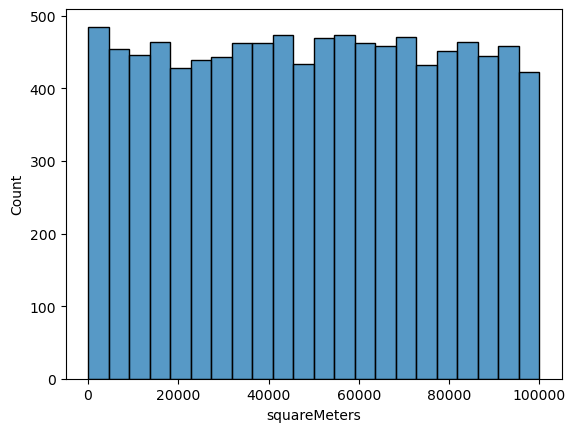

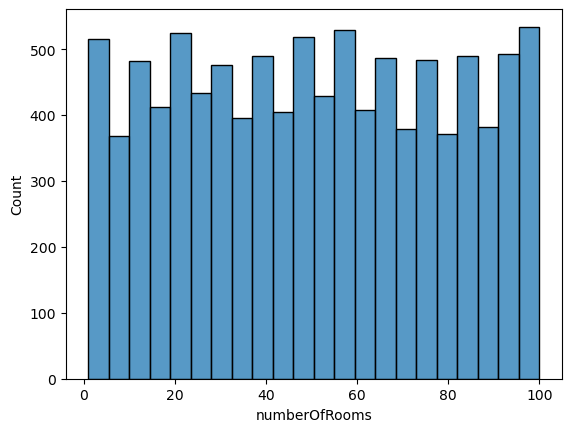

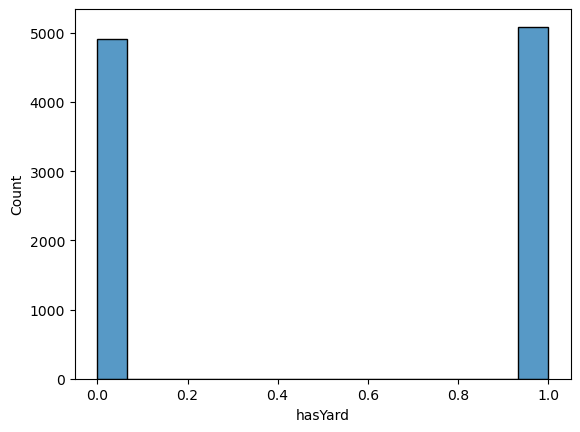

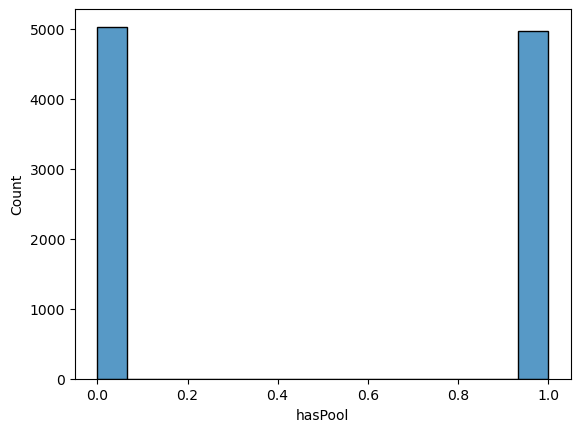

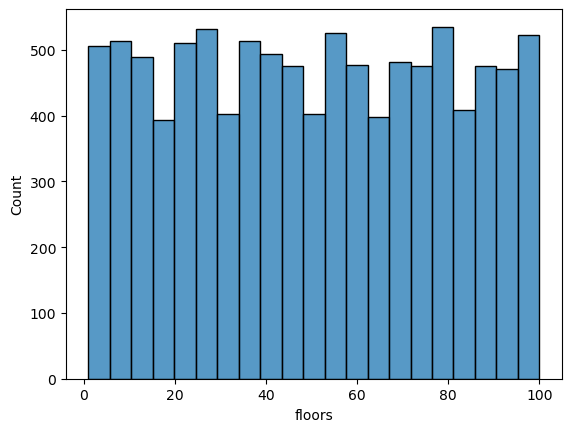

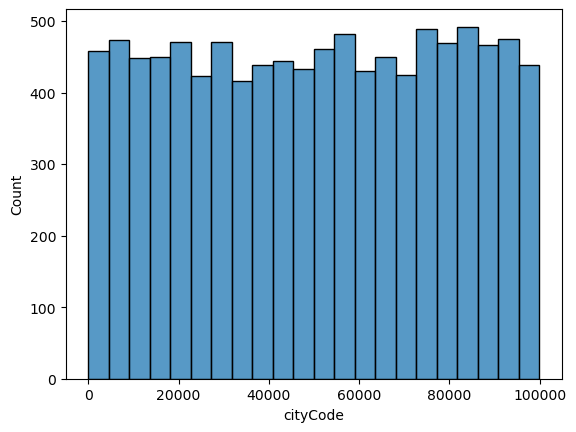

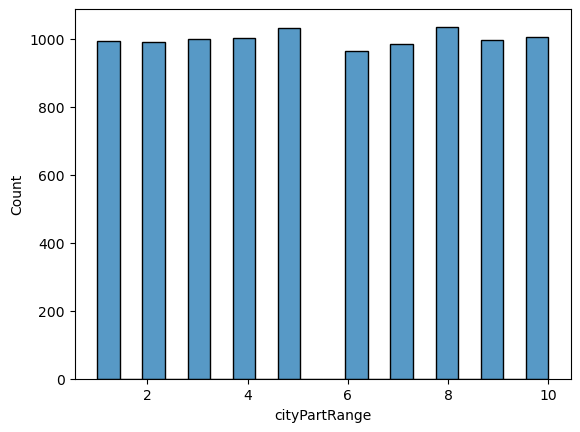

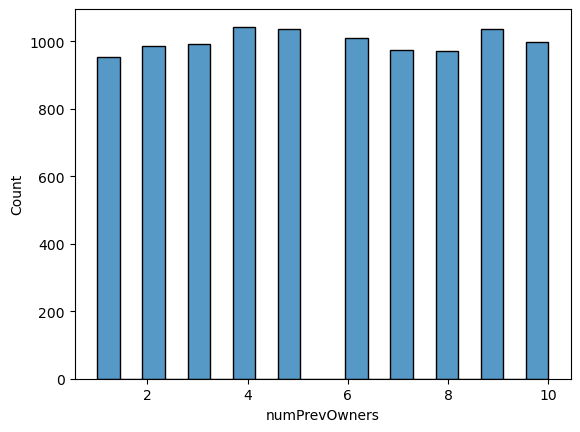

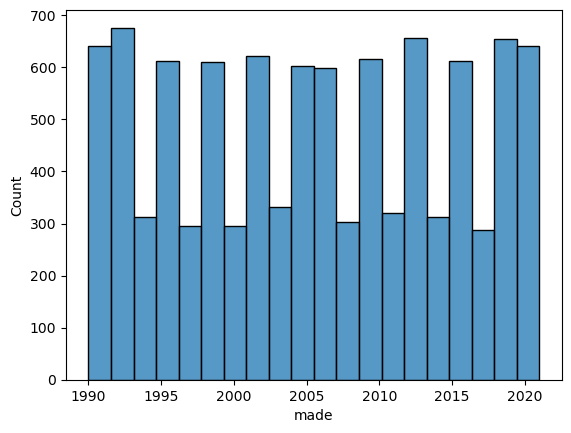

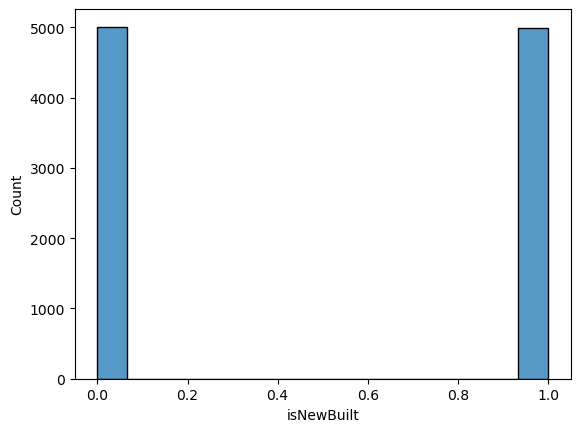

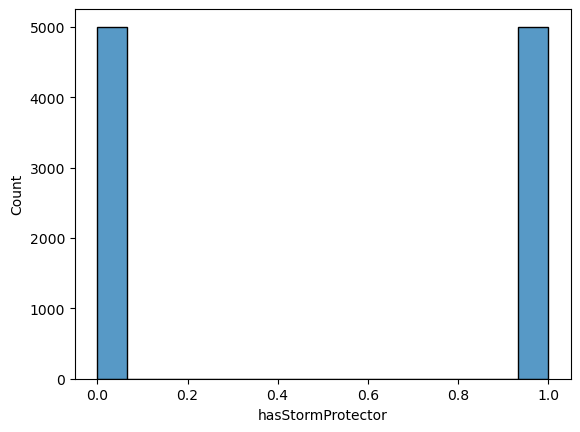

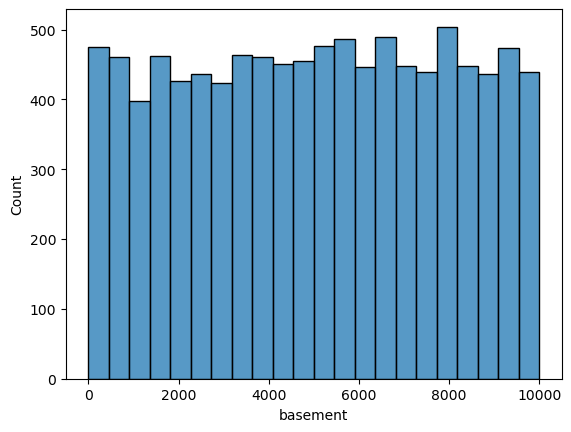

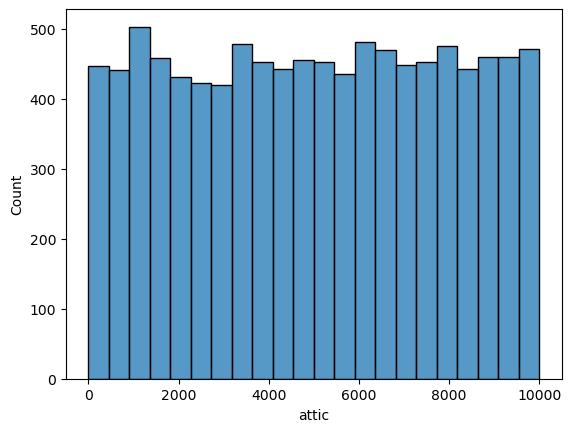

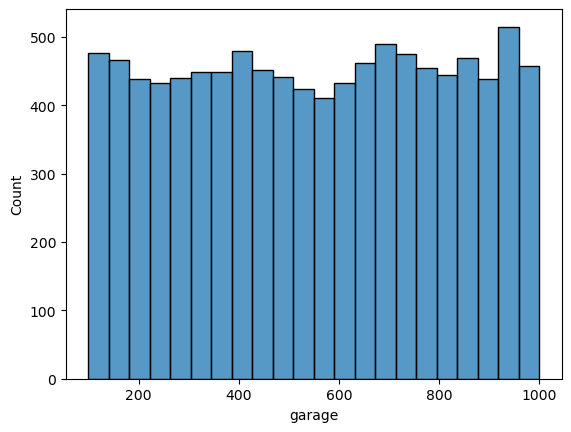

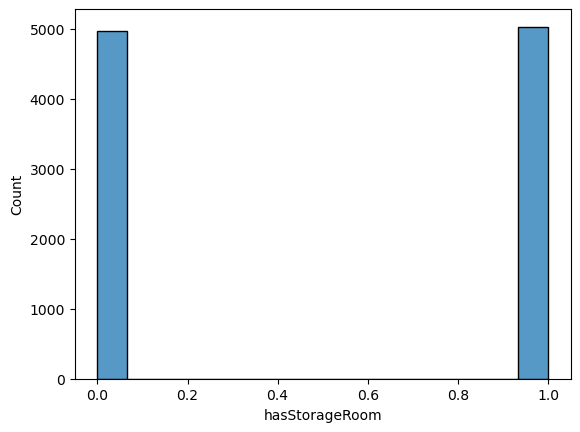

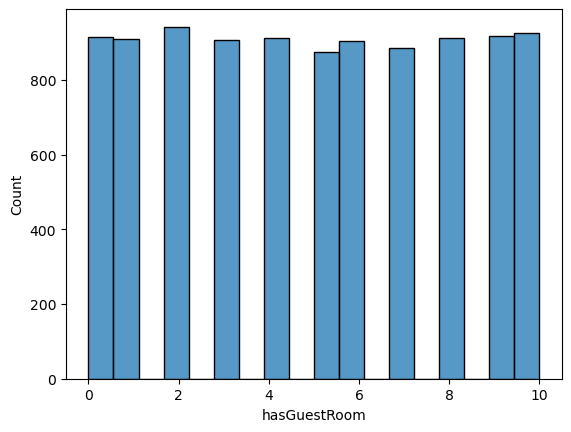

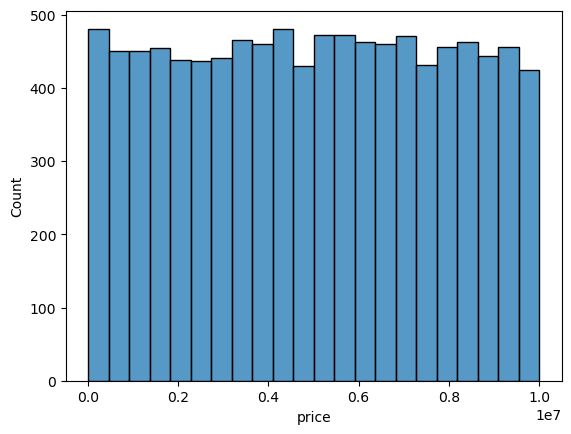

In [9]:
for i in data.columns:
    sns.histplot(x= data[i])
    plt.show()

#### <li>KDE Plot

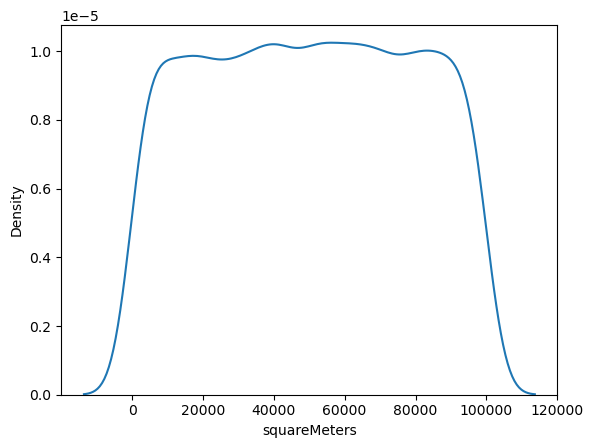

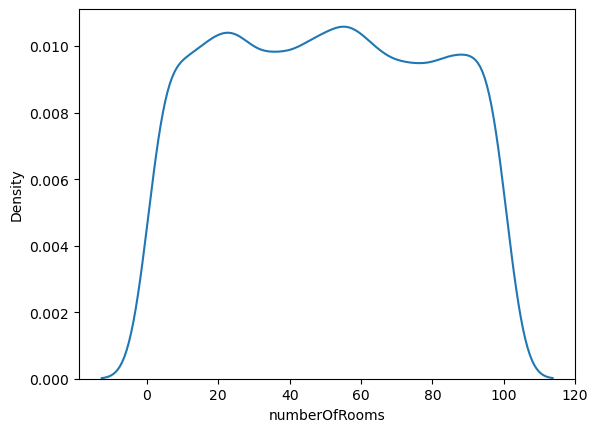

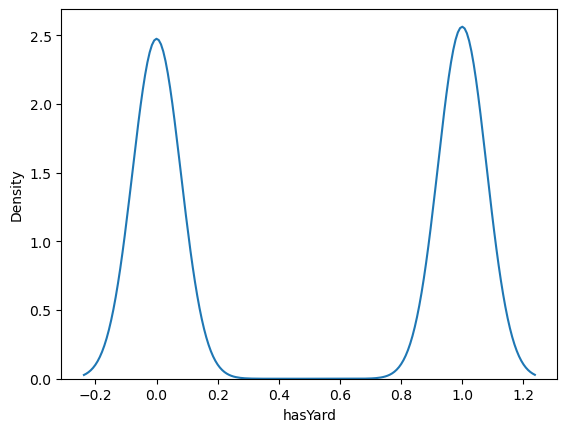

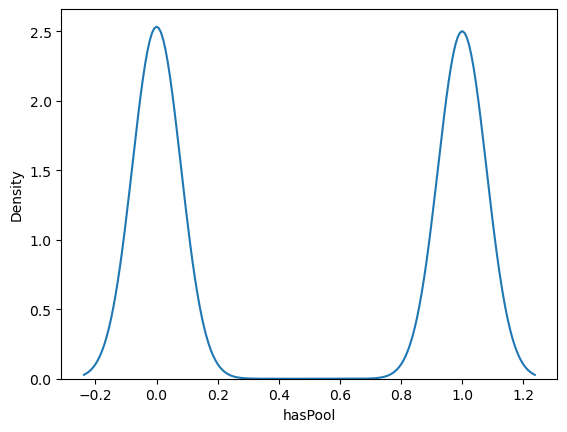

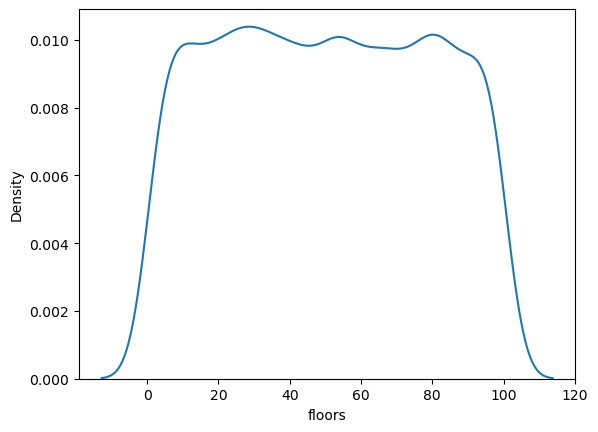

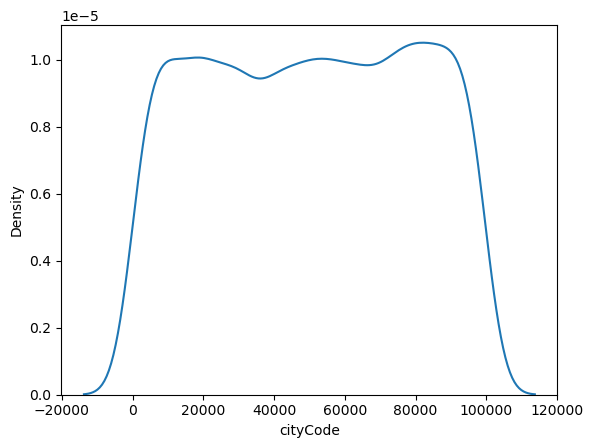

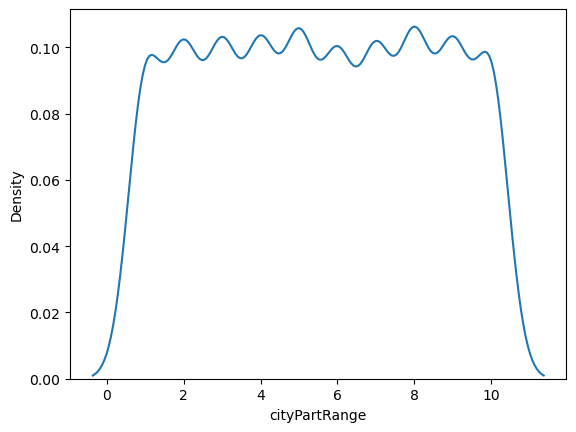

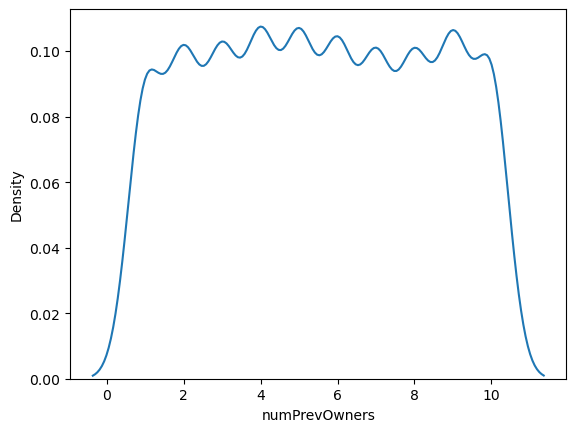

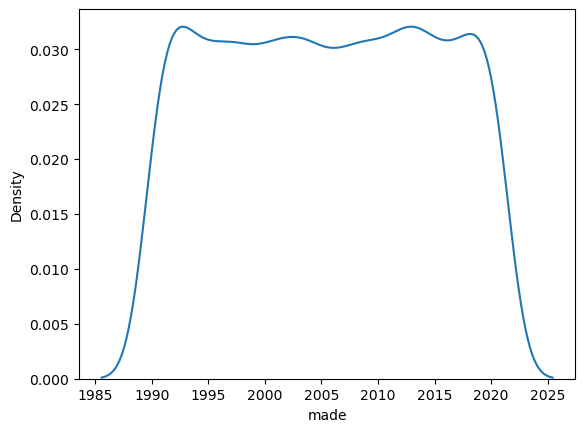

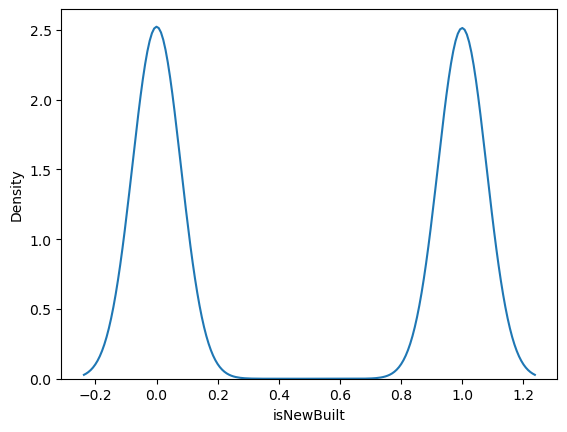

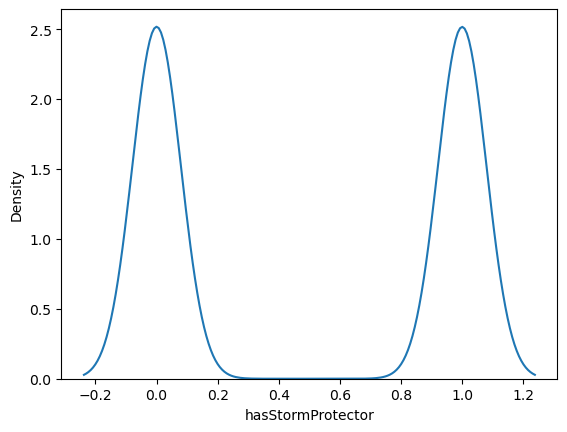

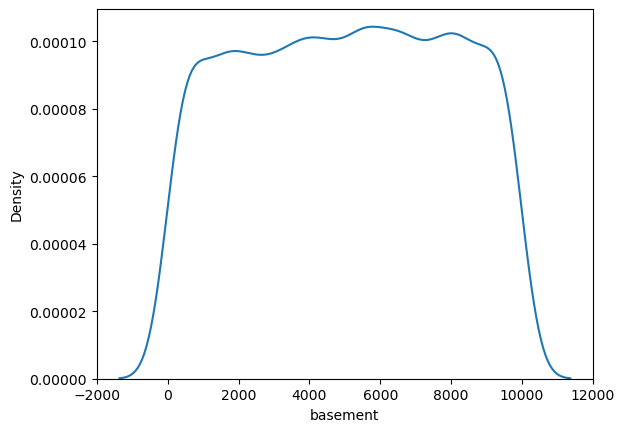

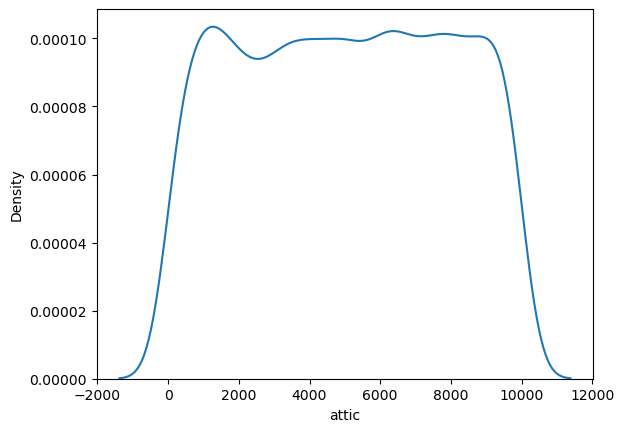

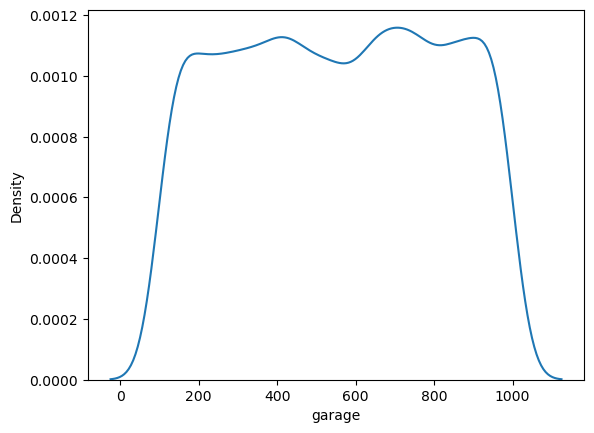

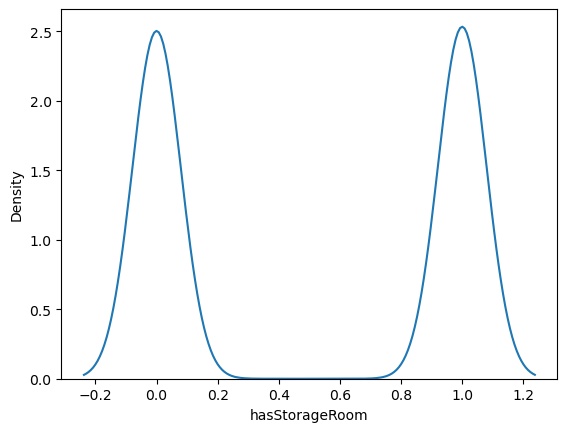

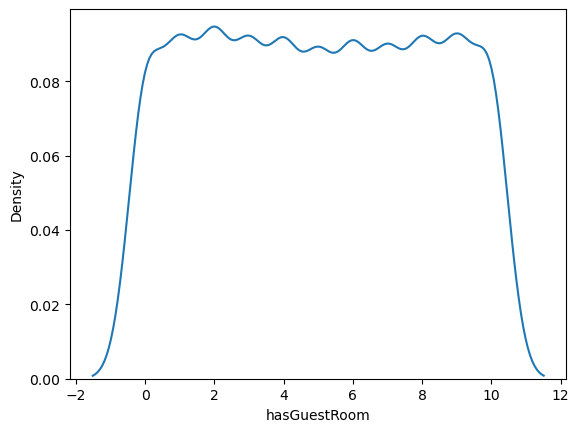

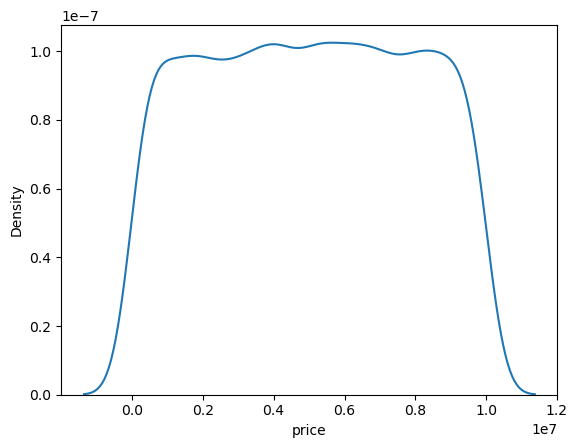

In [10]:
for i in data.columns:
    sns.kdeplot(x = data[i])
    plt.show()

#### <li>Boxplot

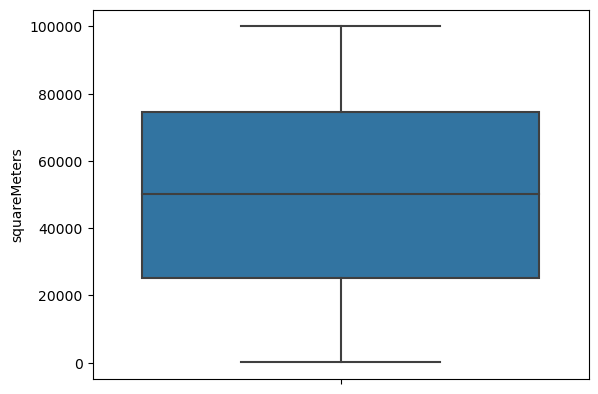

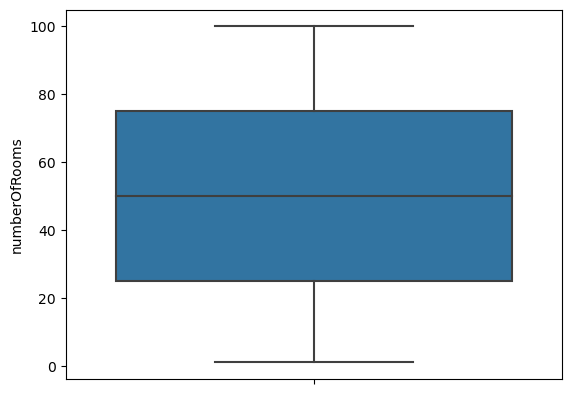

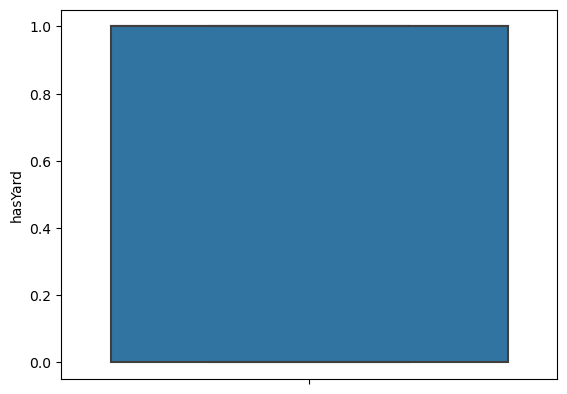

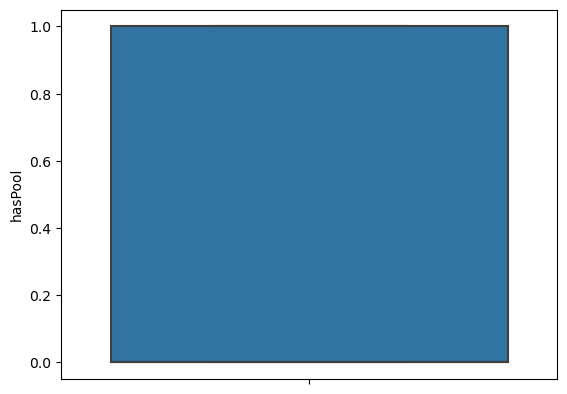

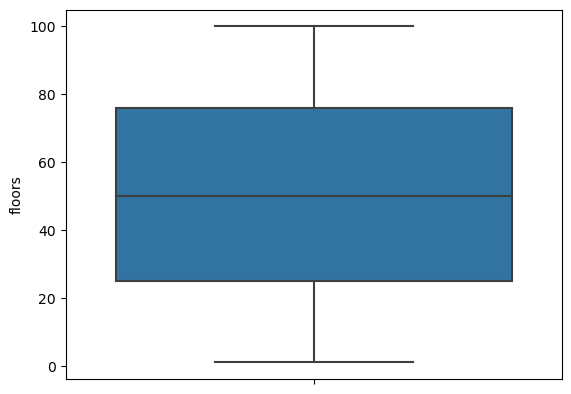

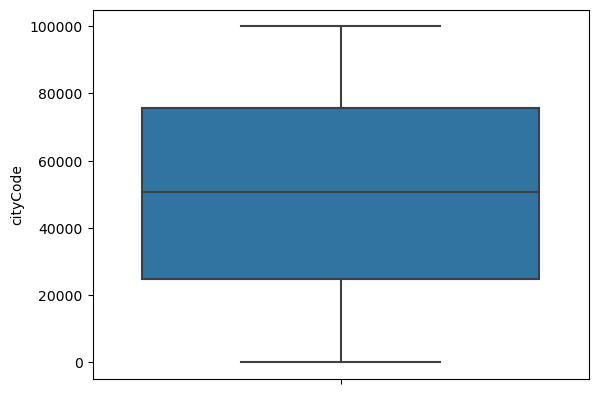

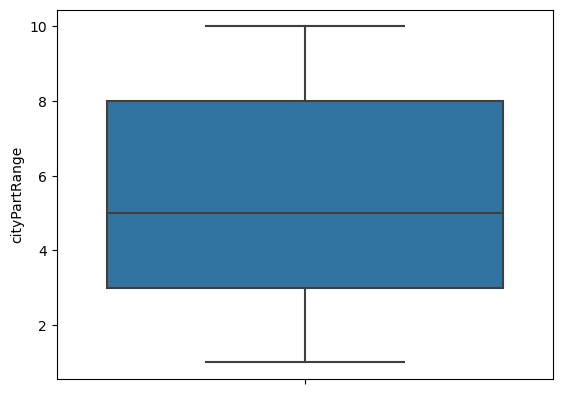

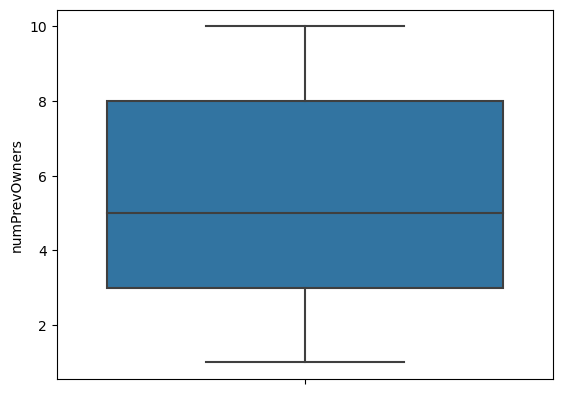

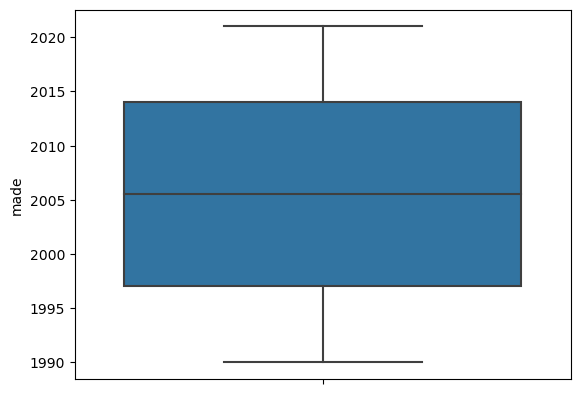

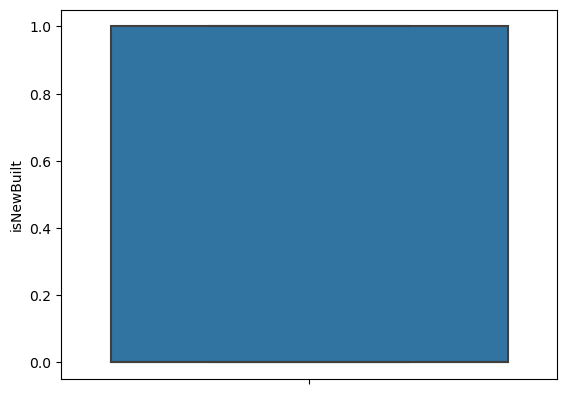

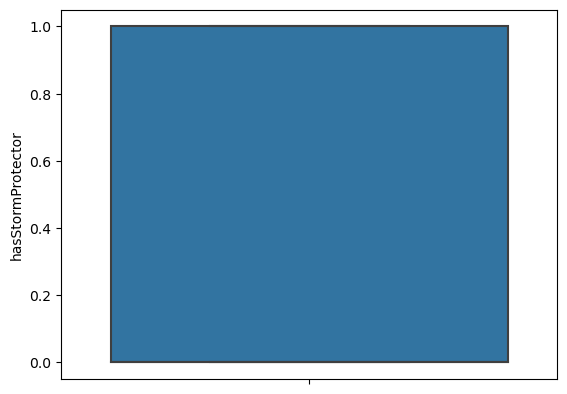

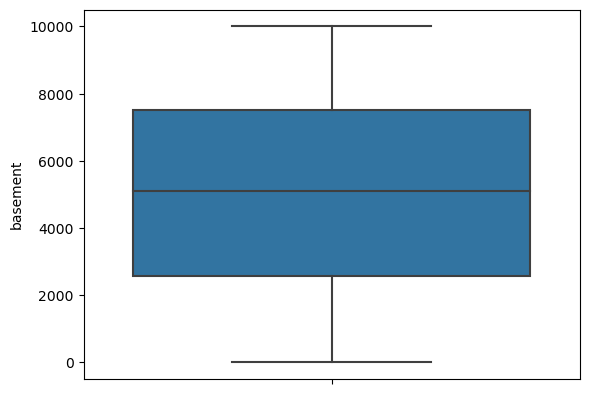

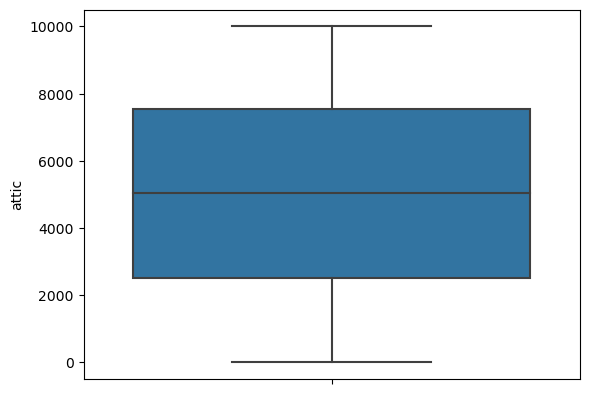

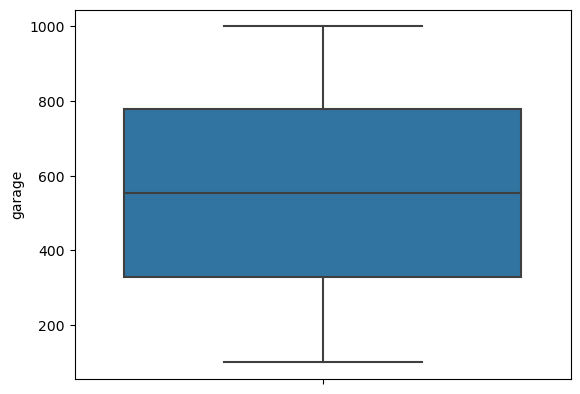

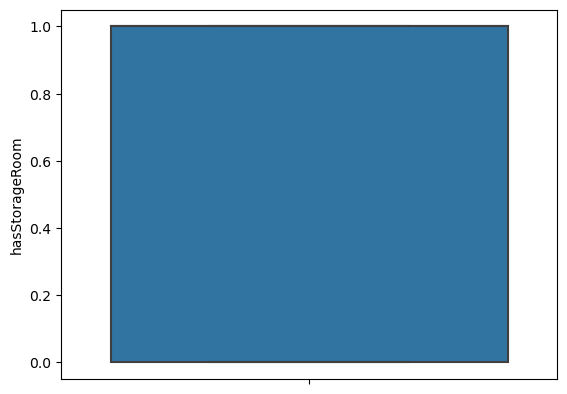

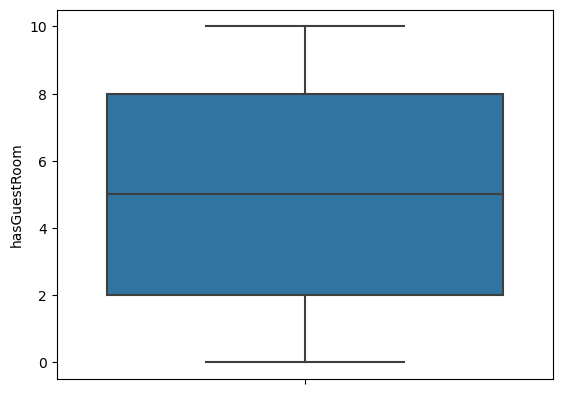

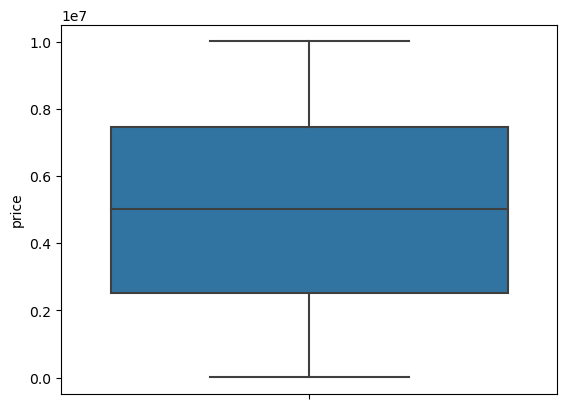

In [11]:
for i in data.columns:
    sns.boxplot(y = data[i])
    plt.show()

In [12]:
le = LabelEncoder()

#### <b>Since there are no categorical values here, no fit_transform is done

### <i><b>Checking the correlation with the target 'Price'

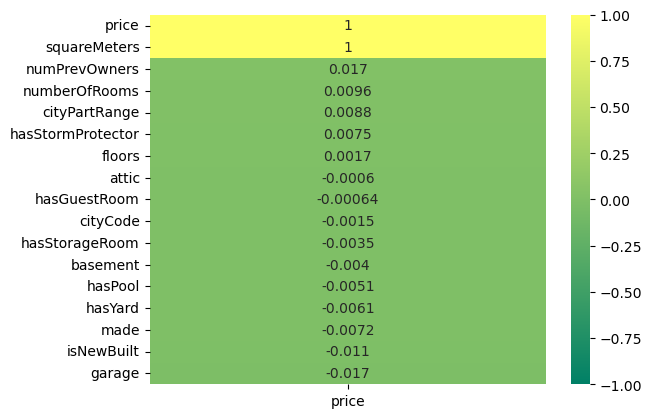

In [13]:
sns.heatmap(data.corr()[['price']].sort_values(by = 'price',ascending = False),vmin = -1,vmax =1,annot= True,cmap='summer')
plt.show()

### <i>Selecting Target

In [14]:
x = data[['squareMeters']].values
print(x)

[[75523]
 [80771]
 [55712]
 ...
 [83841]
 [59036]
 [ 1440]]


In [15]:
y = data['price'].values

### <i>Feature Scaling

In [16]:
fs = RobustScaler()

In [17]:
x = fs.fit_transform(x)

### <i>Model Building

In [18]:
models = {'LinearRegression' : LinearRegression(),
         'Ridge' : Ridge(),
         'LinearSVR' : LinearSVR(),
         'DecisionTreeRegressor' :DecisionTreeRegressor(),
         'GradientBoostingRegressor' : GradientBoostingRegressor(),
         'AdaBoostRegressor' : AdaBoostRegressor(),
         'RandomForestRegressor' : RandomForestRegressor()
          }

In [19]:
for name,model in models.items():
    score = cross_val_score(model, x,y,scoring = "neg_mean_squared_error",cv = 15,n_jobs=-1)
    print('cross validation model :{}'.format(name))
    rsme = np.sqrt(-score)
    rsme_average = np.mean(rsme)
    print("AVERAGE RSME :",rsme_average)
    print("*"*100)

cross validation model :LinearRegression
AVERAGE RSME : 3262.6439868486123
****************************************************************************************************
cross validation model :Ridge
AVERAGE RSME : 3387.7481793142183
****************************************************************************************************
cross validation model :LinearSVR
AVERAGE RSME : 5754560.083684949
****************************************************************************************************
cross validation model :DecisionTreeRegressor
AVERAGE RSME : 4641.667424745645
****************************************************************************************************
cross validation model :GradientBoostingRegressor
AVERAGE RSME : 20199.068746606983
****************************************************************************************************
cross validation model :AdaBoostRegressor
AVERAGE RSME : 358632.17014841747
**************************************************

#### <b>Here,Linear Regression is having Best Performance that other ,So Proceeding with this

In [20]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size = 0.3, random_state = 50, shuffle = True )

In [21]:
x_test.shape

(3000, 1)

### <i>Model Building - Linear Regression

In [22]:
model = LinearRegression()

### <i>Fitting the model with training data

In [23]:
model.fit(x_train,y_train)

LinearRegression()

### <i>Predicting using test data

In [24]:
y_pred = model.predict(x_test)
print(y_pred)

[4010176.64164218 5302069.52466611 6473863.06931154 ... 5046870.93054295
 3284980.63671227 4436874.29098525]


### <i>Evaluating the accuracy

In [25]:
r2_score(y_test,y_pred)

0.9999986900615967

### <i>Testing Accuracy

In [26]:
model.score(x_test,y_test)

0.9999986900615967

### <i>Training Accuracy

In [27]:
model.score(x_train,y_train)

0.9999987232309965

### <i>MAE

In [28]:
mean_absolute_error(y_test,y_pred)

2642.9723279732207

### MSE

In [29]:
mean_squared_error(y_test,y_pred)

10643470.573620096

### <i>Creating a new dataframe with y_test and y_pred

In [30]:
df_out = pd.DataFrame(zip(y_pred,y_pred),columns=['Actual','Prediction'])
df_out

,Actual,Prediction
0,4.010177e+06,4.010177e+06
1,5.302070e+06,5.302070e+06
2,6.473863e+06,6.473863e+06
3,4.277275e+06,4.277275e+06
4,8.805550e+06,8.805550e+06
...,...,...
2995,1.172492e+06,1.172492e+06
2996,1.689889e+06,1.689889e+06
2997,5.046871e+06,5.046871e+06
2998,3.284981e+06,3.284981e+06


### <i>Plotting the result

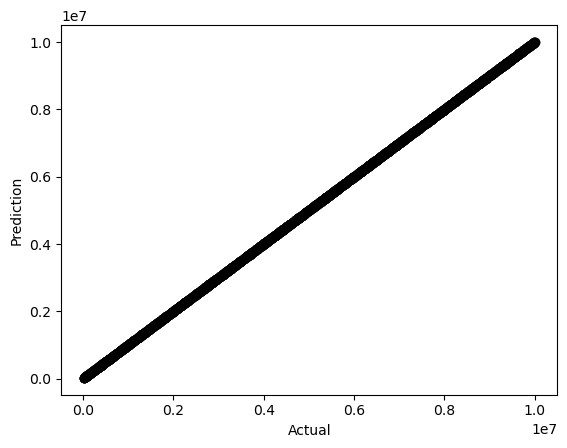

In [31]:
sns.regplot(data = df_out, x = 'Actual',y = 'Prediction',color = 'Black')
plt.show()